In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [196]:
fn_df = pd.read_csv('FakeReal_News_Sites.csv', index_col=[0])
fn_df.sort_values('Site Rating', inplace=True)
fn_df.reset_index(drop=True, inplace=True)
fn_df

,Domain,Page rank integer,Page rank decimal,Site Rank,Domain registrar,Postal code,Country of origin,Harmless,Malicious,Suspicious,Undetected,Timeout,No. of Local links,No. of Outbound links,Total links,Links to fake news site?,Wordpress?,Site Rating
0,actionnews3.com,3,2.82,7390112.0,"GoDaddy.com, LLC",85284,US,86,0,0,10,0,16,1,17,False,True,Fake
1,sputniknews.com,6,5.55,5072.0,"Regional Network Information Center, JSC dba R...",119021,RU,84,0,0,12,0,68,10,78,False,False,Fake
2,stormcloudsgathering.com,4,3.53,2523407.0,NAMECHEAP INC,101,IS,82,0,0,14,0,11,17,28,False,True,Fake
3,tdtalliance.com,3,3.00,5585826.0,NAMECHEAP INC,101,IS,86,0,0,10,0,49,22,71,False,True,Fake
4,teaparty.org,5,4.61,56899.0,"Register.com, Inc.",FALSE,US,83,0,0,13,0,59,3,62,False,True,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,hutchnews.com,4,4.36,151426.0,"GoDaddy Corporate Domains, LLC",NaN,US,86,0,0,10,0,25,15,40,False,False,Real
229,theguardian.com,8,7.51,73.0,"GoDaddy.com, LLC",85284,US,84,0,0,12,0,218,11,229,False,False,Real
230,grandforksherald.com,5,4.70,41638.0,"GoDaddy.com, LLC",85284,US,86,0,0,10,0,151,15,166,False,False,Real
231,news-sentinel.com,4,4.31,195989.0,"GoDaddy.com, LLC",85284,US,83,0,0,13,0,33,14,47,False,True,Real


In [154]:
fn_df.drop(['Timeout'], axis=1, inplace=True)

Average page ranking of real sites

In [155]:
fn_df[fn_df['Site Rating'] == 'Real']['Page rank decimal'].mean()

5.01845238095238

Average page ranking of fake sites

In [156]:
fn_df[fn_df['Site Rating'] == 'Fake']['Page rank decimal'].mean()

3.189328859060401

Average site rank of real sites

In [157]:
fn_df[fn_df['Site Rating'] == 'Real']['Site Rank'].mean()

1177176.738095238

Average site rank of fake sites

In [158]:
fn_df[fn_df['Site Rating'] == 'Fake']['Site Rank'].mean()

10829280.335664336

How many malicious sites were fake

In [192]:
fn_df[(fn_df['Malicious'] == 1) & (fn_df['Site Rating'] == 'Fake')].shape[0]

53

How many malicious sites were real

In [193]:
fn_df[(fn_df['Malicious'] == 0) & (fn_df['Site Rating'] == 'Real')].shape[0]

83

In [161]:
fn_df['Harmless'].value_counts()

85    64
83    45
86    38
84    35
78    14
79    12
82    10
87     4
74     3
81     3
75     2
77     1
80     1
88     1
Name: Harmless, dtype: int64

In [162]:
fn_df[(fn_df['Malicious'] >0) & (fn_df['Site Rating'] == 'Real')].shape[0]

1

In [163]:
fn_df[(fn_df['Suspicious'] >0) & (fn_df['Site Rating'] == 'Real')].shape[0]

2

In [164]:
fn_df[(fn_df['Malicious'] >0) & (fn_df['Site Rating'] == 'Fake')].shape[0]

53

In [165]:
fn_df[(fn_df['Suspicious'] >0) & (fn_df['Site Rating'] == 'Fake')].shape[0]

4

In [166]:
fn_df.loc[fn_df['Malicious'] > 0, 'Malicious'] = 1

In [167]:
fn_df['Malicious'].value_counts()

0    179
1     54
Name: Malicious, dtype: int64

In [168]:
fn_df.drop(['Harmless', 'Undetected'], axis=1, inplace=True)

In [169]:
fn_df['Domain registrar'].value_counts()

GoDaddy.com, LLC                                          49
GoDaddy Corporate Domains, LLC                            22
NAMECHEAP INC                                             21
TUCOWS, INC.                                              14
Network Solutions, LLC                                    12
CSC CORPORATE DOMAINS, INC.                               11
DYNADOT LLC                                                6
MarkMonitor, Inc.                                          6
Key-Systems GmbH                                           6
ABOVE.COM PTY LTD.                                         5
Domain.com, LLC                                            4
GANDI SAS                                                  4
Epik Holdings Inc                                          4
NameSilo, LLC                                              3
Name.com, Inc.                                             2
FastDomain Inc.                                            2
Domainplace LLC         

In [170]:
fn_df['Postal code'].value_counts()

85284                        45
REDACTED FOR PRIVACY         35
101                          19
32256                        13
80202                         5
FALSE                         4
Statutory Masking Enabled     4
22314                         4
98004                         4
60654                         4
85016                         3
102                           3
49418                         3
80201                         2
75013                         2
10007                         2
M6K 3M1                       2
49088                         1
63101                         1
02115-3012                    1
119021                        1
93012                         1
60607-2184                    1
30328                         1
1103                          1
926                           1
1803                          1
65708                         1
70810-1611                    1
Redacted for GDPR privacy     1
10023-6298                    1
11747   

In [171]:
fn_df['Country of origin'].value_counts()

US                      153
IS                       21
FALSE                     5
HK                        4
GI                        3
FR                        3
CA                        3
BG                        3
CN                        2
RO                        2
REDACTED FOR PRIVACY      2
PH                        2
IN                        1
RS                        1
NL                        1
RU                        1
ro                        1
GB                        1
BS                        1
Name: Country of origin, dtype: int64

In [172]:
fn_df[['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin']]

,Domain registrar,Postal code,Links to fake news site?,Wordpress?,Site Rating,Country of origin
0,"GoDaddy.com, LLC",85284,False,True,Fake,US
1,"Regional Network Information Center, JSC dba R...",119021,False,False,Fake,RU
2,NAMECHEAP INC,101,False,True,Fake,IS
3,NAMECHEAP INC,101,False,True,Fake,IS
4,"Register.com, Inc.",FALSE,False,True,Fake,US
...,...,...,...,...,...,...
228,"GoDaddy Corporate Domains, LLC",NaN,False,False,Real,US
229,"GoDaddy.com, LLC",85284,False,False,Real,US
230,"GoDaddy.com, LLC",85284,False,False,Real,US
231,"GoDaddy.com, LLC",85284,False,True,Real,US


In [173]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = fn_df[['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin']]

df_encoded = df.apply(le.fit_transform)

dropped_df = fn_df.drop(['Domain registrar', 'Postal code', 'Links to fake news site?', 'Wordpress?', 'Site Rating', 'Country of origin'], axis=1)
main_df = pd.concat([df_encoded, dropped_df], axis=1, join='inner')
main_df = main_df[['Domain', 'Domain registrar', 'Postal code', 'Links to fake news site?',
       'Wordpress?', 'Page rank integer',
       'Page rank decimal', 'Site Rank', 'Country of origin',
       'Malicious', 'Suspicious',
       'No. of Local links', 'No. of Outbound links', 'Total links', 'Site Rating']]
main_df

,Domain,Domain registrar,Postal code,Links to fake news site?,Wordpress?,Page rank integer,Page rank decimal,Site Rank,Country of origin,Malicious,Suspicious,No. of Local links,No. of Outbound links,Total links,Site Rating
0,actionnews3.com,26,31,0,1,3,2.82,7390112.0,17,0,0,16,1,17,0
1,sputniknews.com,49,9,0,0,6,5.55,5072.0,16,0,0,68,10,78,0
2,stormcloudsgathering.com,36,5,0,1,4,3.53,2523407.0,10,0,0,11,17,28,0
3,tdtalliance.com,36,5,0,1,3,3.00,5585826.0,10,0,0,49,22,71,0
4,teaparty.org,50,38,0,1,5,4.61,56899.0,17,0,0,59,3,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,hutchnews.com,24,45,0,0,4,4.36,151426.0,17,0,0,25,15,40,1
229,theguardian.com,26,31,0,0,8,7.51,73.0,17,0,0,218,11,229,1
230,grandforksherald.com,26,31,0,0,5,4.70,41638.0,17,0,0,151,15,166,1
231,news-sentinel.com,26,31,0,1,4,4.31,195989.0,17,0,0,33,14,47,1


In [191]:
main_df[(main_df['Malicious'] == 1) & (main_df['Site Rating'] == 1)].shape[0]


1

In [189]:
main_df[(main_df['Wordpress?'] == 1) & (main_df['Site Rating'] == 0)].shape[0]

15

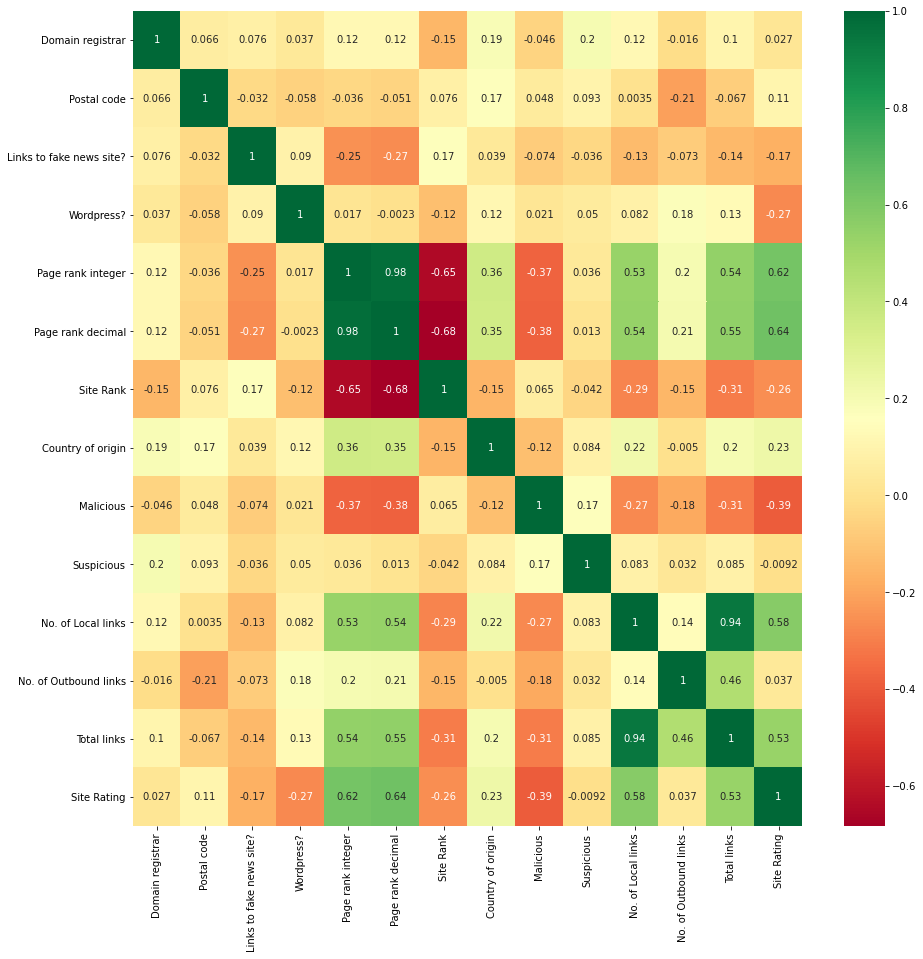

In [176]:
import seaborn as sns
corrmat = main_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (15,15))
g = sns.heatmap(main_df[top_corr_features].corr(), annot=True , cmap = 'RdYlGn')

<AxesSubplot:title={'center':'Domain registrar'}, xlabel='Site Rating'>

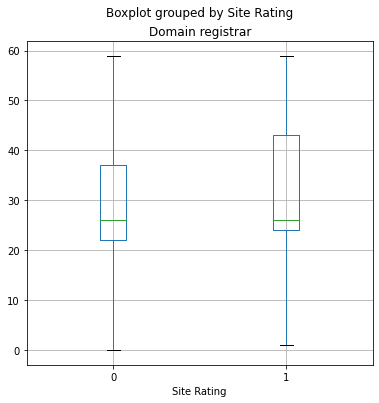

In [177]:
main_df.boxplot(column = 'Domain registrar', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Postal code'}, xlabel='Site Rating'>

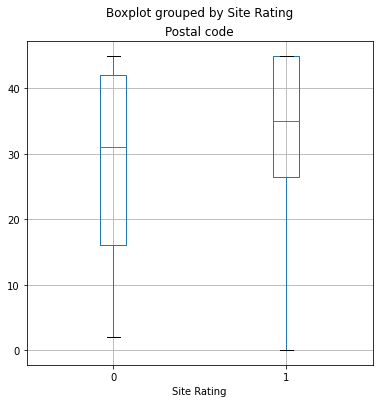

In [178]:
main_df.boxplot(column = 'Postal code', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'No. of Local links'}, xlabel='Site Rating'>

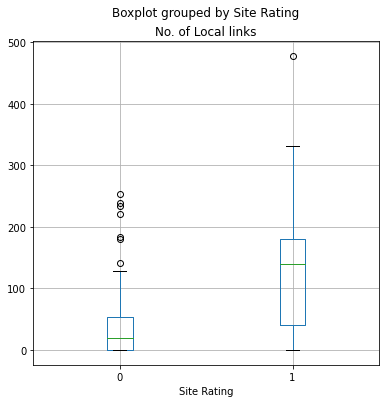

In [179]:
main_df.boxplot(column = 'No. of Local links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'No. of Outbound links'}, xlabel='Site Rating'>

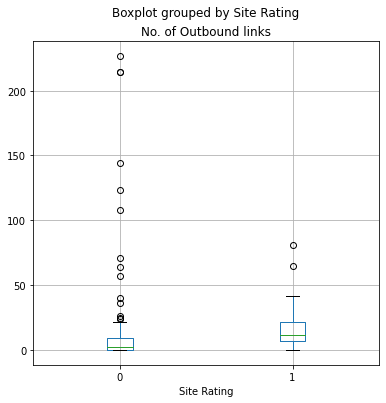

In [180]:
main_df.boxplot(column = 'No. of Outbound links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Total links'}, xlabel='Site Rating'>

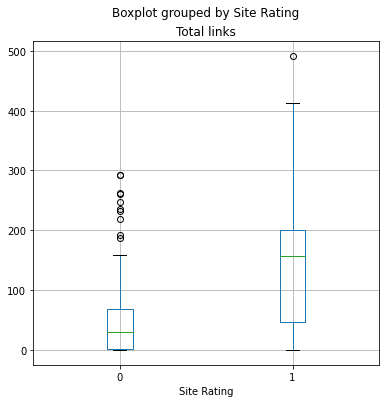

In [181]:
main_df.boxplot(column = 'Total links', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Page rank decimal'}, xlabel='Site Rating'>

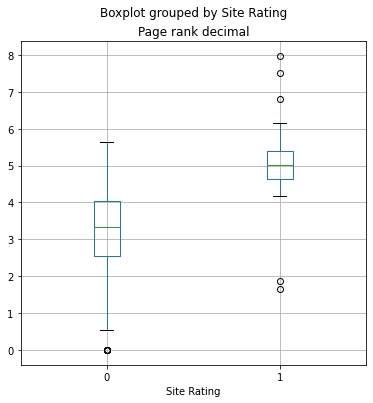

In [182]:
main_df.boxplot(column = 'Page rank decimal', by = 'Site Rating', figsize = (6, 6))

<AxesSubplot:title={'center':'Site Rank'}, xlabel='Site Rating'>

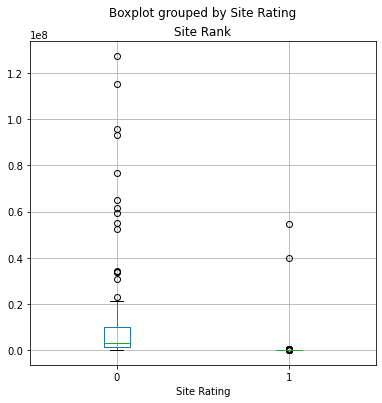

In [183]:
main_df.boxplot(column = 'Site Rank', by = 'Site Rating', figsize = (6, 6))

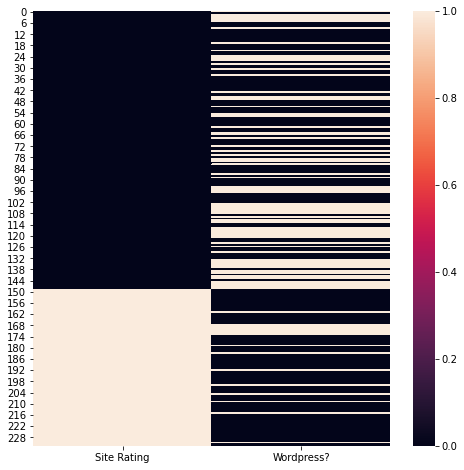

In [194]:
plt.figure(figsize = (8,8))
sns.heatmap(main_df[['Site Rating', 'Wordpress?']])
plt.show()

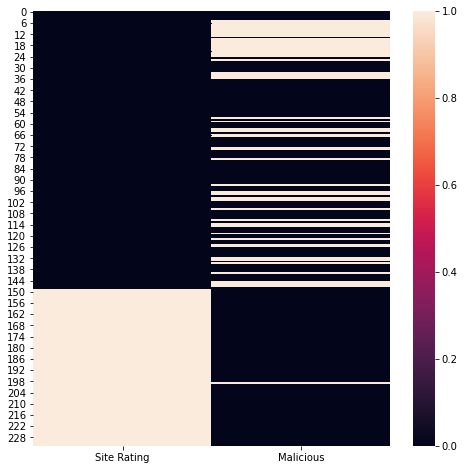

In [195]:
plt.figure(figsize = (8,8))
sns.heatmap(main_df[['Site Rating', 'Malicious']])
plt.show()

In [186]:
X = main_df[['Postal code', 'Links to fake news site?',
       'Wordpress?', 
       'Page rank decimal', 'Site Rank', 'Country of origin',
       'Malicious', 
       'No. of Local links', 'Total links']]

y = main_df['Site Rating'].values

In [187]:
X

,Postal code,Links to fake news site?,Wordpress?,Page rank decimal,Site Rank,Country of origin,Malicious,No. of Local links,Total links
0,31,0,1,2.82,7390112.0,17,0,16,17
1,9,0,0,5.55,5072.0,16,0,68,78
2,5,0,1,3.53,2523407.0,10,0,11,28
3,5,0,1,3.00,5585826.0,10,0,49,71
4,38,0,1,4.61,56899.0,17,0,59,62
...,...,...,...,...,...,...,...,...,...
228,45,0,0,4.36,151426.0,17,0,25,40
229,31,0,0,7.51,73.0,17,0,218,229
230,31,0,0,4.70,41638.0,17,0,151,166
231,31,0,1,4.31,195989.0,17,0,33,47


In [188]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])